# Grid Traversal & Shortest Paths



In [ ]:
%matplotlib inline

from importlib import reload

import logging
logging.basicConfig(level=logging.WARN,format='%(levelname)s - %(message)s')
logging.getLogger("graph.undirectedgraph").setLevel(logging.INFO)
logging.getLogger("graph.directedgraph").setLevel(logging.INFO)

In [ ]:
# Add the data structure folder to path
import sys
sys.path.insert(0,'../../../chapter/05_graph/')

## Exercise I

Find a graph representation for the following grid:

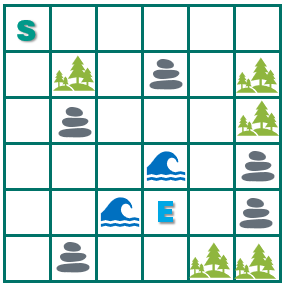

In [ ]:
from networkx import neighbors
from graph.undirectedgraph import * 
import matplotlib.pyplot as plt

import networkx as nx

g = Graph()
for i in range(0,36):
    g.add_node(Node(str(i)))

## All edges, even both directions
g.add_edge_between(str(0),str(1))
g.add_edge_between(str(0),str(6))
g.add_edge_between(str(1),str(0))
g.add_edge_between(str(1),str(2))
g.add_edge_between(str(2),str(1))
g.add_edge_between(str(2),str(3))
g.add_edge_between(str(2),str(8))
g.add_edge_between(str(3),str(2))
g.add_edge_between(str(3),str(4))
g.add_edge_between(str(4),str(3))
g.add_edge_between(str(4),str(5))
g.add_edge_between(str(4),str(10))
g.add_edge_between(str(5),str(4))
g.add_edge_between(str(6),str(0))
g.add_edge_between(str(6),str(12))
g.add_edge_between(str(8),str(2))
g.add_edge_between(str(8),str(14))
g.add_edge_between(str(10),str(4))
g.add_edge_between(str(10),str(16))
g.add_edge_between(str(12),str(6))
g.add_edge_between(str(12),str(18))
g.add_edge_between(str(14),str(8))
g.add_edge_between(str(14),str(15))
g.add_edge_between(str(14),str(20))
g.add_edge_between(str(15),str(14))
g.add_edge_between(str(15),str(16))
g.add_edge_between(str(18),str(12))
g.add_edge_between(str(18),str(24))
g.add_edge_between(str(18),str(19))
g.add_edge_between(str(19),str(18))
g.add_edge_between(str(19),str(20))
g.add_edge_between(str(19),str(25))
g.add_edge_between(str(20),str(14))
g.add_edge_between(str(20),str(19))
g.add_edge_between(str(22),str(16))
g.add_edge_between(str(22),str(28))
g.add_edge_between(str(24),str(25))
g.add_edge_between(str(24),str(18))
g.add_edge_between(str(24),str(30))
g.add_edge_between(str(25),str(24))
g.add_edge_between(str(25),str(19))
g.add_edge_between(str(27),str(28))
g.add_edge_between(str(27),str(33))
g.add_edge_between(str(28),str(27))
g.add_edge_between(str(28),str(22))
g.add_edge_between(str(30),str(24))
g.add_edge_between(str(32),str(33))
g.add_edge_between(str(33),str(32))
g.add_edge_between(str(33),str(27))


Let's plot the graph first:

In [ ]:
import matplotlib.pyplot as plt

G = g.toNetworkx()
pos=nx.spring_layout(G,scale=3)
nx.draw(G, with_labels=True, font_weight="bold", node_size=250, alpha=0.5)
plt.show()

Do a BFS traversal and ensure there is a path to the end node E.

Then find a path with Dijkstra's Algorithm.

In [ ]:
g.traversal_BFS(startingNodeLabel="0")

In [ ]:
## Dijkstra
previous_nodes, shortest_path = g.shortestPaths_Dijkstra(startingNodeLabel="0")

print("Way from 0 -> 27:")
print(g.make_path(previous_nodes, shortest_path, startingNodeLabel="0", endNodeLabel="27" ))

## Exercise II

Find a graph representation for the following grid.

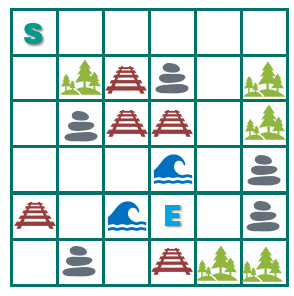

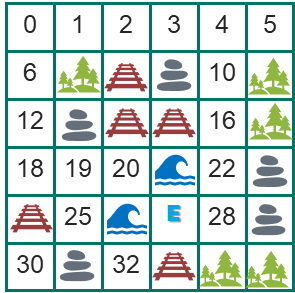

In [ ]:
from networkx import neighbors
from graph.directedgraph import * 
import matplotlib.pyplot as plt

import networkx as nx

# Construct graph a bit more sophisticated this time.

max_colums = 6
max_rows = 6

weight_normal = 2
weight_train = 1
weight_forest = 3
weight_stone = 4
weight_water = 5

g = DirectedGraph()
for i in range(0,max_colums*max_rows):
    g.add_node(Node(str(i)))

# Add edged programmatically.
# We know: all fields are connected to their neighbors.
for row in range(0,max_rows):
    for column in range(0,max_colums):
        currentField = (row * max_colums) + column
        field_left = currentField - 1
        field_right = currentField + 1
        field_top = currentField - max_colums
        field_bottom = currentField + max_colums

        # Add an edge to a neighbor if neighbor is "in the grid"
        if(field_left >= 0 and field_left >= (row*max_colums)*1):
            g.add_edge_between(str(currentField), str(field_left), weight_normal)
        if(field_right < (row+1)*max_colums ):
            g.add_edge_between(str(currentField), str(field_right), weight_normal)
        if(field_top >= 0):
            g.add_edge_between(str(currentField), str(field_top), weight_normal)
        if(field_bottom < max_rows*max_colums):
            g.add_edge_between(str(currentField), str(field_bottom), weight_normal)

# All special grid fields / nodes
special_forest = [7, 11, 17, 34, 35]
special_train = [8, 14, 15, 24, 33]
special_stone = [9, 13, 31, 29, 23]
special_water = [21, 26]

# Update weights for entering forest
for special_node in special_forest:
    for previous_node in g.get_previous_nodes(special_node):
        g.add_edge(previous_node, special_node, weight_forest)
# Update weights for entering train
for special_node in special_train:
    for previous_node in g.get_previous_nodes(special_node):
        g.add_edge(previous_node, special_node, weight_train)
# Update weights for entering stone
for special_node in special_stone:
    for previous_node in g.get_previous_nodes(special_node):
        g.add_edge(previous_node, special_node, weight_stone)
# Update weights for entering water
for special_node in special_water:
    for previous_node in g.get_previous_nodes(special_node):
        g.add_edge(previous_node, special_node, weight_water)

#g.print_matrix()

Plot graph

In [ ]:
import matplotlib.pyplot as plt

G = g.toNetworkx()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight="bold", node_size=500, alpha=0.3)
nx.draw_networkx_edge_labels(G, pos, edge_labels=g.getEdgeLabels(), font_color='blue')
plt.show()

Find a path with Dijkstra's Algorithm.

In [ ]:
## Dijkstra
previous_nodes, shortest_path = g.shortestPaths_Dijkstra(startingNodeLabel="0")

print("Way from 0 -> 27:")
print(g.make_path(previous_nodes, shortest_path, startingNodeLabel="0", endNodeLabel="27" ))